Topic 2 : Understanding the Formation of the Spectra in the Average Quiet Atmosphere
===
# Objectives
---
* To understand the formation of spectra in a stellar atmosphere in LTE.
* To determine the formation heights for given wavelengths
* To determine the absorption profiles from the spectra

# Principles
---
If $I_\lambda$ is known near disk center ($\mu \simeq 1$) as function of $\lambda$, and one has the standard model
of the average quiet atmosphere: $T(t_r)$, $z(t_r)$ as functions of optical depth tr at the reference
wavelength $5000\overset{\lower.5em\circ}{\mathrm{A}}$, one can determine 1) the temperature $T_1$ of the spectral formation region
at the wavelength $\lambda$, 2) the optical depth $\tau_\lambda$ and height $z$ of the spectral formation region in the model atmosphere, and 3) the relative absorption coefficient $\kappa_\lambda/\kappa_r$, under the LTE assumption.
1. Note that the intensity $I_\lambda$ emerging out of a stellar atmosphere in LTE is formally given by 
$$
I^{out}_\lambda = \int_{0}^{\infty} B_\lambda(T(t_\lambda))exp(-t_\lambda)dt_\lambda
$$
which can be reduced to a very simple form
$$
I^{out}_\lambda = B_\lambda(T_1)
$$
with the Eddington-Barbier approximation. The temperature $T_1$ is the temperature of the
region where $\tau_\lambda = 1$ and is found to be
$$
T_1 = B^{-1}_\lambda(I^{out}_\lambda)
$$
where $B^{-1}_\lambda$ is the inverse function of $B_\lambda(T)$ for the given wavelength $\lambda$.
2. By comparing $T_1$ with the run of temperature in the model atmosphere $T(t_r)$, one can
determine $\tau_r$ the optical depth of the region of $\tau_\lambda = 1$, from the relationship
$$
T_1 = T(\tau_r(\tau_\lambda = 1)),
$$
or its inversion
$$
\tau_r(\tau_\lambda = 1) = T^{-1} [T_1].
$$
3. Assuming that the absorption coefficient is independent of height, we can easily derive the relationship
$$
\frac{\kappa_\lambda}{\kappa_r} = \frac{1}{\tau_r(\tau_\lambda = 1)}
$$
that describes the variation of the absorption coefficient with wavelength.
4. The absorption coefficient ratio can be modeled like
$$
\frac{\kappa_\lambda}{\kappa_r} = \frac{\kappa_c}{\kappa_r} + \sum_{k = 0}^{N-1} \frac{\kappa_k}{\kappa_r}\frac{H(u_k,a_k)}{H(0,a_k)}
$$
with $u_k = (\lambda - \lambda_k)/\Delta\lambda_{D,k}$. The free parameters are $\kappa_c/\kappa_r$, and $\kappa_k/\kappa_r$, $\lambda_k$, $\Delta\lambda_{D,k}$ and $a_k~for~k = 0, ..., N-1$ where $N$ is the number of spectral lines in the spectral band.

# Procedures
---
The following procedures are to be taken for each of the Hα band data set and the Ca II
band data set.
1. Construct the arrays $\lambda_w$ (in $\overset{\lower.5em\circ}{\mathrm{A}}$) and $I_w$ (in data count) ($w = 0, 1, ..., N_w − 1$) representing $I_\lambda$ of the average quiet atmosphere.
2. Referring to Allen’s Astrophysical Quantities, find the value of continuum intensity in CGS unit.
3. Multiply to $I_w$ a numeric factor that makes the intensity at $\lambda - \lambda_0 = 4.5 \overset{\lower.5em\circ}{\mathrm{A}}$ be equal to 0.85 times the continuum intensity in cgs unit. Plot $I_w$ versus $\lambda_w$.
4. Determine the temperature $T_1$ using equation (3) for every $w$. Plot $T_1$ versus $\lambda$.
5. Determine the height $z$ of the formation region making use of the model atmosphere. Plot $z$ versus $\lambda$.
6. Determine the optical depth $\tau_r$ of the formation region making use of the model atmosphere. Plot $\tau_r$ versus $\lambda$.
7. Plot $\kappa_\lambda/\kappa_r$ versus $\lambda$ using equation (5).
8. Apply the non-linear square fitting to $\kappa_\lambda/\kappa_r$ using the model equation (7) to determine the free parameters.
9. Prepare a table presenting $I_\lambda/I_c$ ($I_c$ is the local continuum intensity) and $T$, $z$, $\tau_r$ of the formation region, and $\kappa_\lambda/\kappa_r$ for the following wavelengths:
    * Hα band: continuum wavelength, $\lambda − \lambda_0 = 1, 2, 4 \overset{\lower.5em\circ}{\mathrm{A}}$, the center of the line near $\lambda − \lambda_0 = −3.3 \overset{\lower.5em\circ}{\mathrm{A}}$
    * Ca II band: continuum wavelength, $\lambda − \lambda_0 = 1, 2, 4, 0.6 \overset{\lower.5em\circ}{\mathrm{A}}$, the center of the line near $\lambda − \lambda_0 = −5.8 \overset{\lower.5em\circ}{\mathrm{A}}$
10. Discuss together what you found and learned from these procedures.

In [1]:
from __future__ import absolute_import, division
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
from fisspy.read import FISS

# read current directory path
dirn = os.getcwd()

# read data from modeling
modelFile = join(dirn,'falc.dat')
model = np.loadtxt(modelFile)
HEIGHTS = model[:,0]
TAU_500 = model[:,1]
COLUMN_DENSITY = model[:,2]
TEMPERATURE = model[:,3]
N_ELECTRON = model[:,7]

# read data from observation
data_Ha = join(dirn, 'FISS_20130717_191246_A1_c.fts') 
data_Ca = join(dirn, 'FISS_20130717_191246_B1_c.fts')
Ha = FISS(data_Ha)
Ca = FISS(data_Ca)

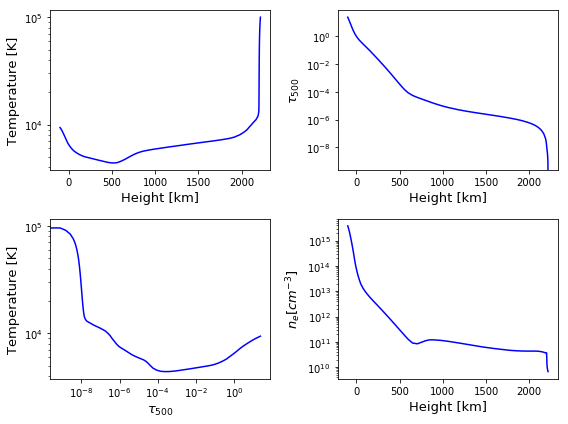

In [54]:
# Draw the 'falc.dat' model!

# set figures
fig, ax = plt.subplots(2,2, figsize=[8,6])
fsize = 13 #font size

ax[0,0].plot(HEIGHTS, TEMPERATURE, 'b')
ax[0,0].set_xlabel('Height [km]', fontsize=fsize)
ax[0,0].set_ylabel('Temperature [K]', fontsize=fsize)
#ax[0,0].set_xlim(-100, 1500)
#ax[0,0].set_ylim(4e3, 1e4)
ax[0,0].set_yscale('log')
    
ax[0,1].plot(HEIGHTS, TAU_500, 'b')
ax[0,1].set_xlabel('Height [km]', fontsize=fsize)
ax[0,1].set_ylabel(r'$\tau_{500}$', fontsize=fsize)
#ax[0,1].set_xlim(-100, 1500)
#ax[0,1].set_ylim(1e-6, 1e2)
ax[0,1].set_yscale('log')
    
ax[1,0].plot(TAU_500, TEMPERATURE, 'b')
ax[1,0].set_xlabel(r'$\tau_{500}$', fontsize=fsize)
ax[1,0].set_ylabel('Temperature [K]', fontsize=fsize)
#ax[1,0].set_xlim(1e2, 1e-6)
#ax[1,0].set_ylim(4e3, 1e4)
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
    
ax[1,1].plot(HEIGHTS, N_ELECTRON, 'b')
ax[1,1].set_xlabel('Height [km]', fontsize=fsize)
ax[1,1].set_ylabel(r'$n_e [cm^{-3}$]', fontsize=fsize)
#ax[1,1].set_xlim(-100, 1500)
ax[1,1].set_yscale('log')
    
fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

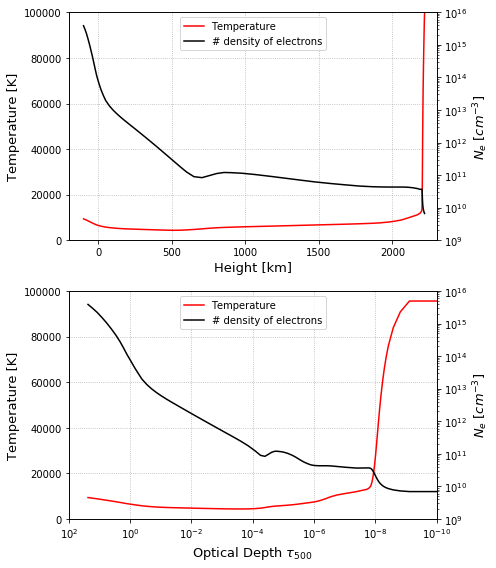

In [57]:
# Plot the model with modified features!

# set figures
fig, ax = plt.subplots(2, figsize=(7,8))
fsize = 13 #font size

# height to temperature and n_el
ax0 = ax[0].twinx()
line_T = ax[0].plot(HEIGHTS, TEMPERATURE, 'r', label='Temperature')
line_Nel = ax0.plot(HEIGHTS, N_ELECTRON, 'k', label='# density of electrons')
    
ax[0].set_xlabel('Height [km]', fontsize=fsize)
ax[0].set_ylabel('Temperature [K]', fontsize=fsize)
ax0.set_ylabel(r'$N_e$ [$cm^{-3}$]', fontsize=fsize)
    
ax[0].set_xlim(-200,2300)
ax[0].set_ylim(0, 1e5)
ax0.set_ylim(1e9, 1e16)
ax0.set_yscale('log')
ax[0].grid(ls=':')
    
lines = line_T + line_Nel
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=9)

# optical depth to temperature and n_el
ax1 = ax[1].twinx()
line_T = ax[1].plot(TAU_500, TEMPERATURE, 'r', label='Temperature')
line_Nel = ax1.plot(TAU_500, N_ELECTRON, 'k', label='# density of electrons')
    
ax[1].set_xlabel(r'Optical Depth $\tau_{500}$', fontsize=fsize)
ax[1].set_ylabel('Temperature [K]', fontsize=fsize)
ax1.set_ylabel(r'$N_e$ [$cm^{-3}$]', fontsize=fsize)

ax[1].set_xlim(1e2, 1e-10)
ax[1].set_ylim(0, 1e5)
ax1.set_ylim(1e9, 1e16)
ax[1].set_xscale('log')
ax1.set_yscale('log')
ax[1].grid(ls=':')
    
lines = line_T + line_Nel
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=9)

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

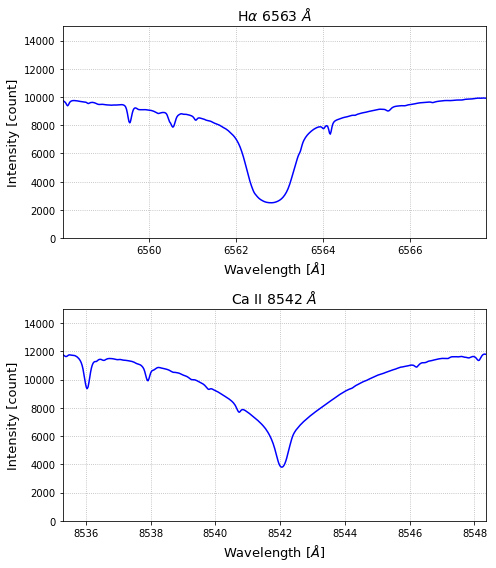

In [3]:
# Draw Specific Intensity with data counts!

# set figures
fig, ax = plt.subplots(2,1, figsize=(7,8))
tsize = 14 #title size
fsize = 13 #font size

# H alpha
ax[0].plot(Ha.wv, Ha.refProfile, 'b')
ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0].set_ylim(0, 1.5e4)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel('Intensity [count]', fontsize=fsize)
ax[0].grid(ls=':')

# Ca II
ax[1].plot(Ca.wv, Ca.refProfile, 'b')
ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1].set_ylim(0, 1.5e4)
ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel('Intensity [count]', fontsize=fsize)
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

In [4]:
# Interpolation function!
def interpolation(x, y, y_crit):
    values = []
    for i in range(len(x)):
        if y[i] == y_crit:
            value = x[i]
            values.append(value)
    for i in range(len(x)-1):
        if (y[i+1] - y_crit)*(y[i] - y_crit) < 0:
            value = x[i] + (y_crit - y[i])*(x[i+1] - x[i])/(y[i+1] - y[i])
            values.append(value)

    return sorted(values)

k value of Ha =  0.000250321360177446
k value of Ca =  0.00013342023974201208


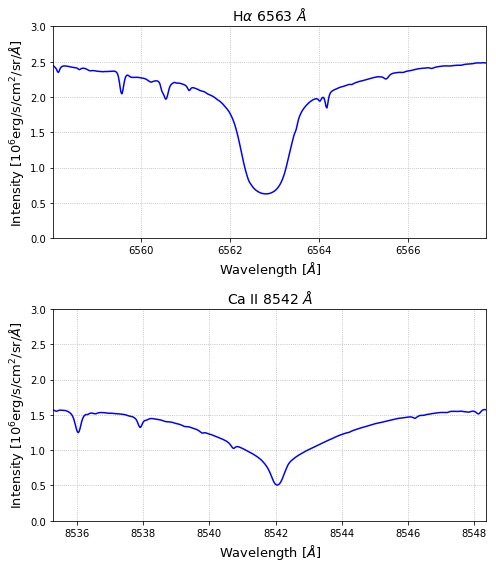

In [5]:
# Draw Specific Intensity with CGS unit!

# referring to Allen's Astronomical Quantities, the values of continuum intensity
Ic_Ha = 2.90 # [1e6 erg/s/cm^2/str/A]
Ic_Ca = 1.775 # [1e6 erg/s/cm^2/str/A]

# calibrate intensity in CGS unit
wv_ref_Ha = Ha.wvRef + 4.5
wv_ref_Ca = Ca.wvRef + 4.5
inten_ref_Ha = interpolation(Ha.refProfile, Ha.wv, wv_ref_Ha)
inten_ref_Ca = interpolation(Ca.refProfile, Ca.wv, wv_ref_Ca)

k_Ha = 0.85*Ic_Ha/inten_ref_Ha[0]
k_Ca = 0.85*Ic_Ca/inten_ref_Ca[0]
print('k value of Ha = ', k_Ha)
print('k value of Ca = ', k_Ca)

# set figures
fig, ax = plt.subplots(2,1, figsize=(7,8))
tsize = 14 #title size
fsize = 13 #font size

# H alpha
ax[0].plot(Ha.wv, Ha.refProfile*k_Ha, 'b')
ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0].set_ylim(0, 3)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel(r'Intensity [$10^{6}$erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
ax[0].grid(ls=':')

# Ca II
ax[1].plot(Ca.wv, Ca.refProfile*k_Ca, 'b')
ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1].set_ylim(0, 3)
ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel(r'Intensity [$10^{6}$erg/s/cm$^{2}$/sr/$\AA$]', fontsize=fsize)
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

In [6]:
# Inverse Planck function to calculate corresponding temperatures!
def Temperature(wv, I):
    T = []
    c = 2.998*1e+10   #Speed of light [cm/s]
    h = 6.626*1e-27   #Planck constant [erg*s]
    k = 1.381*1e-16   #Boltzmann constant [erg/K]
    const1 = h*c/k
    const2 = 2*h*c**2*1e-14
    
    for i in range(len(wv)):
        wv_cm = wv[i]*1e-8
        T.append(const1/(wv_cm*np.log(1 + const2/wv_cm**5/I[i])))
    return T

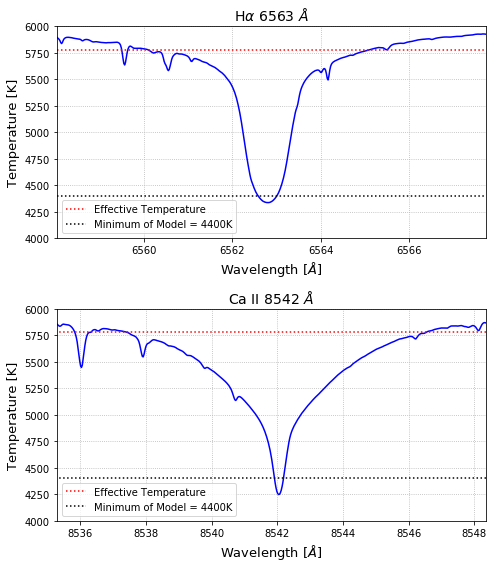

In [21]:
# Calculate T1 using Inverse Planck function!

T1_Ha = Temperature(Ha.wv, Ha.refProfile*k_Ha)
T1_Ca = Temperature(Ca.wv, Ca.refProfile*k_Ca)
T_EFF = 5780 #[K]

# set figures
fig, ax = plt.subplots(2,1, figsize=(7,8))
tsize = 14 #title size
fsize = 13 #font size

# H alpha
ax[0].plot(Ha.wv, T1_Ha, 'b')
ax[0].plot(Ha.wv, T_EFF*np.ones(len(T1_Ha)), 'r:', label='Effective Temperature')
ax[0].plot(Ha.wv, min(TEMPERATURE)*np.ones(len(T1_Ha)), 'k:', label='Minimum of Model = 4400K')
ax[0].set_xlim(Ha.wv.min(), Ha.wv.max())
ax[0].set_ylim(4000, 6000)
ax[0].set_title(r'H$\alpha$ 6563 $\AA$', fontsize=tsize)
ax[0].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[0].set_ylabel('Temperature [K]', fontsize=fsize)
ax[0].legend()
ax[0].grid(ls=':')

# Ca II
ax[1].plot(Ca.wv, T1_Ca, 'b')
ax[1].plot(Ca.wv, T_EFF*np.ones(len(T1_Ca)), 'r:', label='Effective Temperature')
ax[1].plot(Ca.wv, min(TEMPERATURE)*np.ones(len(T1_Ca)), 'k:', label='Minimum of Model = 4400K')
ax[1].set_xlim(Ca.wv.min(), Ca.wv.max())
ax[1].set_ylim(4000, 6000)
ax[1].set_title(r'Ca II 8542 $\AA$', fontsize=tsize)
ax[1].set_xlabel(r'Wavelength [$\AA$]', fontsize=fsize)
ax[1].set_ylabel('Temperature [K]', fontsize=fsize)
ax[1].legend()
ax[1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

In [80]:
# Linear Extrapolation the region under the 4400 K, which is the minimum temperature of model!

from scipy.interpolate import interp1d

x = HEIGHTS[54:80]
y = TEMPERATURE[54:80]
z = TAU_500[54:80]

# 1 : linear extrapolation with respect to height
temp_extpol1 = interp1d(x, y, fill_value='extrapolate')

# 2 : linear extrapolation with respect to reference optical depth
temp_extpol2 = interp1d(np.log(z), y, fill_value='extrapolate')

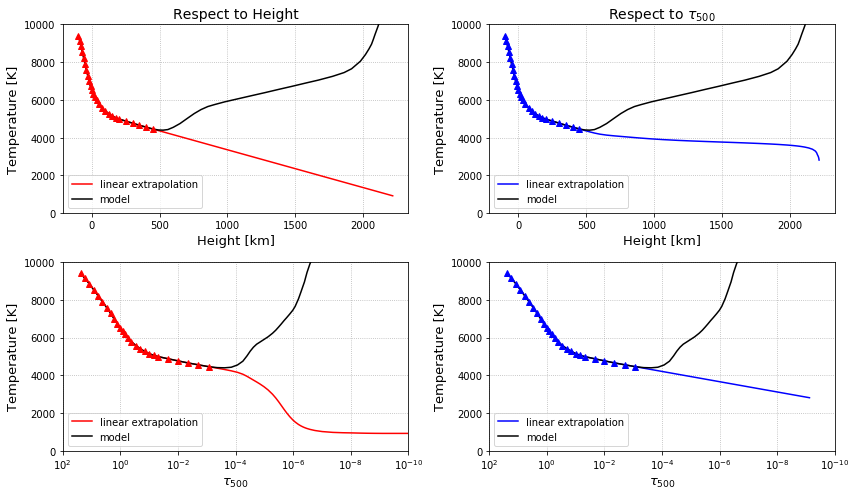

In [84]:
# Draw the extrapolation graphs!

# set figures
fig, ax = plt.subplots(2, 2, figsize=(12,7))
tsize = 14 #title size
fsize = 13 #font size

# height to temperature (1)
ax[0,0].plot(HEIGHTS, temp_extpol1(HEIGHTS), 'r-', label='linear extrapolation')
ax[0,0].plot(HEIGHTS, TEMPERATURE, 'k', label='model')
ax[0,0].plot(HEIGHTS[54:80], TEMPERATURE[54:80], 'r^')

ax[0,0].set_title('Respect to Height', fontsize=tsize)
ax[0,0].set_xlabel('Height [km]', fontsize=fsize)
ax[0,0].set_ylabel('Temperature [K]', fontsize=fsize)
ax[0,0].set_ylim(0,1e4)
ax[0,0].legend()
ax[0,0].grid(ls=':')

# optical depth to temperature (1)
ax[1,0].plot(TAU_500, temp_extpol1(HEIGHTS), 'r-', label='linear extrapolation')
ax[1,0].plot(TAU_500, TEMPERATURE, 'k', label='model')
ax[1,0].plot(TAU_500[54:80], TEMPERATURE[54:80], 'r^')

ax[1,0].set_xlabel(r'$\tau_{500}$', fontsize=fsize)
ax[1,0].set_ylabel('Temperature [K]', fontsize=fsize)
ax[1,0].set_xlim(1e2, 1e-10)
ax[1,0].set_ylim(0,1e4)
ax[1,0].set_xscale('log')
ax[1,0].legend()
ax[1,0].grid(ls=':')

# temperature for extrapolation 2
temp2 = temp_extpol2(np.log(TAU_500[1:]))

# height to temperature (2)
ax[0,1].plot(HEIGHTS[1:], temp2, 'b-', label='linear extrapolation')
ax[0,1].plot(HEIGHTS, TEMPERATURE, 'k', label='model')
ax[0,1].plot(HEIGHTS[54:80], TEMPERATURE[54:80], 'b^')

ax[0,1].set_title(r'Respect to $\tau_{500}$', fontsize=tsize)
ax[0,1].set_xlabel('Height [km]', fontsize=fsize)
ax[0,1].set_ylabel('Temperature [K]', fontsize=fsize)
ax[0,1].set_ylim(0,1e4)
ax[0,1].legend()
ax[0,1].grid(ls=':')

# optical depth to temperature (2)
ax[1,1].plot(TAU_500[1:], temp2, 'b-', label='linear extrapolation')
ax[1,1].plot(TAU_500, TEMPERATURE, 'k', label='model')
ax[1,1].plot(TAU_500[54:80], TEMPERATURE[54:80], 'b^')

ax[1,1].set_xlabel(r'$\tau_{500}$', fontsize=fsize)
ax[1,1].set_ylabel('Temperature [K]', fontsize=fsize)
ax[1,1].set_xlim(1e2, 1e-10)
ax[1,1].set_ylim(0,1e4)
ax[1,1].set_xscale('log')
ax[1,1].legend()
ax[1,1].grid(ls=':')

fig.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=1000)
plt.show()

In [78]:
TAU_500 == 0

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [44]:
print(x)
print(y)
print(TEMPERATURE)

[ 450.  400.  350.  300.  250.  200.  175.  150.  125.  100.   75.   50.
   35.   20.   10.    0.  -10.  -20.  -30.  -40.  -50.  -60.  -70.  -80.
  -90. -100.]
[8.510e-04 1.984e-03 4.526e-03 1.009e-02 2.203e-02 4.728e-02 6.873e-02
 9.922e-02 1.421e-01 2.021e-01 2.874e-01 4.132e-01 5.218e-01 6.746e-01
 8.141e-01 9.999e-01 1.253e+00 1.611e+00 2.145e+00 2.946e+00 4.129e+00
 5.858e+00 8.362e+00 1.196e+01 1.695e+01 2.365e+01]
[100000.  95600.  90816.  83891.  75934.  71336.  66145.  60170.  53284.
  49385.  45416.  41178.  36594.  32145.  27972.  24056.  20416.  17925.
  16500.  15000.  14250.  13500.  13000.  12000.  11150.  10550.   9900.
   9450.   9200.   8950.   8700.   8400.   8050.   7650.   7450.   7250.
   7050.   6900.   6720.   6560.   6390.   6230.   6040.   5900.   5755.
   5650.   5490.   5280.   5030.   4750.   4550.   4430.   4400.   4410.
   4460.   4560.   4660.   4770.   4880.   4990.   5060.   5150.   5270.
   5410.   5580.   5790.   5980.   6180.   6340.   6520.   6720.

Topic 3 : Understanding the Formation of the Spectra in a Bright Point
===

# Objectives
---
To understand how the spectra depend on the structure of the atmosphere. 

# Principles
---
Bright points appear brighter than the average quiet atmosphere at many wavelengths. The contrast is the highest in the inner wings of the H$\alpha$ line and the Ca II line. Why does a bright point look different from the average atmosphere? To find an answer, we think of two hypotheses.

1. **It is because bright points are hotter.** This effect can be modelled by multiplying $T$ by a constant factor $c$ greater than 1.
2. **It is because bright points are evacuated.** The structure of temperature given as a function of height is the same as the average atmosphere. But the spectral formation region of a bright point is located lower and hotter than that of the average quiet atmosphere because the bright point is optically more transparent than the average atmosphere.
The effect of evacuation can be modeled by decreasing the absorption coefficient or choosing the deeper region of the average atmospheric model $\tau_\lambda = c$ or $\tau_r = c\tau_\lambda$ for with $c > 1$.

# Demo.py
---
We use `demo.py` for this project II.
```
"""
"""

from __future__ import absolute_import, division
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from fisspy.read import FISS

__author__= "Juhyeong Kang"
__email__ = "jhkang@astro.snu.ac.kr"

readModel = False
readFISS = False
plotFISS =True
dirn = r'D:\TA\181004\lab2_new'
x = 87
y = 60

if readModel:
    # Read the FAL model 

    modelFile = join(dirn,'falc.dat')
    model = np.loadtxt(modelFile)
    h = model[:,0]
    tau500 = model[:,1]
    m = model[:,2]
    T = model[:,3]
    nel = model[:,7]

    # Plot the model
    fig, ax = plt.subplots(2,2, figsize=[8,6])
    ax[0,0].plot(h, T, 'k')
    ax[0,0].set_xlabel('Height [km]')
    ax[0,0].set_ylabel('T [K]')
    ax[0,0].set_xlim(-100, 1500)
    ax[0,0].set_ylim(4e3, 1e4)
    
    ax[0,1].plot(h, tau500, 'k')
    ax[0,1].set_xlabel('Height [km]')
    ax[0,1].set_ylabel(r'$\tau_{500}$')
    ax[0,1].set_xlim(-100, 1500)
    ax[0,1].set_ylim(1e-6, 1e2)
    ax[0,1].set_yscale('log')
    
    ax[1,0].plot(tau500, T, 'k')
    ax[1,0].set_xlabel(r'$\tau_{500}$')
    ax[1,0].set_ylabel('T [K]')
    ax[1,0].set_xlim(1e2, 1e-6)
    ax[1,0].set_ylim(4e3, 1e4)
    ax[1,0].set_xscale('log')
    
    ax[1,1].plot(h, nel, 'k')
    ax[1,1].set_xlabel('Height [km]')
    ax[1,1].set_ylabel(r'$n_e [cm^{-3}$]')
    ax[1,1].set_xlim(-100, 1500)
    ax[1,1].set_yscale('log')
    
    fig.tight_layout()
    plt.show()

if readFISS:    
    # Read FISS file
    fa = join(dirn, 'FISS_20130717_191246_A1_c.fts') 
    fb = join(dirn, 'FISS_20130717_191246_B1_c.fts')
    
    ha = FISS(fa)
    ca = FISS(fb)
    hw_ha = 0.5
    hw_ca = 0.2
    
    #Calculate the lambdameter(doppler shift)
    shiftHa, intenHa = ha.lambdaMeter(hw_ha,
                                      wvRange=[ha.wvRef-1.2, ha.wvRef + 1.2])
    shiftCa, intenCa = ca.lambdaMeter(hw_ca,
                                      wvRange=[ha.wvRef-1.2, ca.wvRef + 1.2])
    
    #Get raster images
    rasterHa = ha.getRaster(ha.wvRef + np.array([0, 0.6, 1, 4.5]))
    rasterCa = ca.getRaster(ca.wvRef + np.array([0, 0.6, 2, 5.5]))
    
if plotFISS:
    delx = 1
    dely = 5
    
    #Display the spectrogram
    ha.showSpectrogram(x)
    plt.hlines(y, -0.5, ha.nwv-0.5, colors='r', linestyles='dashed')
    ca.showSpectrogram(x+delx)
    plt.hlines(y+dely, -0.5, ca.nwv-0.5, colors='r', linestyles='dashed')
    
    #Display Ha profile
    fig_profile, ax_profile = plt.subplots(2, 1, figsize=(7,8))
    ax_profile[0].plot(ha.wv, ha.refProfile, 'b')
    ax_profile[0].plot(ha.wv, ha.frame[y,x], 'k')
    ax_profile[0].hlines(intenHa[y,x], shiftHa[y,x] - hw_ha,
                          shiftHa[y,x] + hw_ha, 'r')
    ax_profile[0].vlines(shiftHa[y,x], 0, intenHa[y,x], 'r')
    ax_profile[0].set_xlim(ha.wv.min(), ha.wv.max())
    ax_profile[0].set_ylim(0, 1.5e4)
    ax_profile[0].set_xlabel(r'Wavelength [$\AA$]')
    ax_profile[0].set_ylabel('Intensity [count]')
    ax_profile[0].set_title(r'H$\alpha$')
    
    #Display Ca Profile
    ax_profile[1].plot(ca.wv, ca.refProfile, 'b')
    ax_profile[1].plot(ca.wv, ca.frame[y+dely,x+delx], 'k')
    ax_profile[1].hlines(intenCa[y+dely,x+delx],
                          shiftCa[y+dely,x+delx] - hw_ca,
                          shiftCa[y+dely,x+delx] + hw_ca, 'r')
    ax_profile[1].vlines(shiftCa[y+dely,x+delx], 0,
                          intenCa[y+dely,x+delx], 'r')
    ax_profile[1].set_xlim(ca.wv.min(), ca.wv.max())
    ax_profile[1].set_ylim(0, 1.5e4)
    ax_profile[1].set_xlabel(r'Wavelength [$\AA$]')
    ax_profile[1].set_ylabel('Intensity [count]')
    ax_profile[1].set_title(r'Ca II 8542 $\AA$')
    
    fig_profile.tight_layout()
    plt.show()
    
    #Dislpay the Ha raster images
    figRasterHa, axRasterHa = plt.subplots(2, 2,
                                           sharex= True, sharey= True,
                                           figsize= [8,8])
    axRasterHa[0,0].imshow(ha.raster[0], ha.cm, origin= 'lower')
    axRasterHa[0,1].imshow(ha.raster[1], ha.cm, origin= 'lower')
    axRasterHa[1,0].imshow(ha.raster[2], ha.cm, origin= 'lower')
    axRasterHa[1,1].imshow(ha.raster[3], ha.cm, origin= 'lower')
    axRasterHa[0,0].tick_params(labelleft=False)
    axRasterHa[1,1].tick_params(labelbottom=False)
    axRasterHa[1,0].set_xlabel('X [pix]')
    axRasterHa[1,0].set_ylabel('Y [pix]')
    
    for i in range(2):
        for axi in axRasterHa[i]:
            axi.hlines(y, -0.5, ha.nx - 0.5, 'k', linestyles='dotted')
            axi.vlines(x, -0.5, ha.ny - 0.5, 'k', linestyles='dotted')
    figRasterHa.tight_layout(pad=0.1)
    
    #Dislpay the Ca raster images
    figRasterCa, axRasterCa = plt.subplots(2, 2,
                                           sharex= True, sharey= True,
                                           figsize= [8,8])
    axRasterCa[0,0].imshow(ca.raster[0], ca.cm, origin= 'lower')
    axRasterCa[0,1].imshow(ca.raster[1], ca.cm, origin= 'lower')
    axRasterCa[1,0].imshow(ca.raster[2], ca.cm, origin= 'lower')
    axRasterCa[1,1].imshow(ca.raster[3], ca.cm, origin= 'lower')
    axRasterCa[0,0].tick_params(labelleft=False)
    axRasterCa[1,1].tick_params(labelbottom=False)
    axRasterCa[1,0].set_xlabel('X [pix]')
    axRasterCa[1,0].set_ylabel('Y [pix]')
    
    for i in range(2):
        for axi in axRasterCa[i]:
            axi.hlines(y+dely, -0.5, ca.nx - 0.5, 'k', linestyles='dotted')
            axi.vlines(x+delx, -0.5, ca.ny - 0.5, 'k', linestyles='dotted')
    figRasterCa.tight_layout(pad=0.1)
```

# Procedures
---
The following procedures can be taken for either of the H$\alpha$ band data set and the Ca II
band data set.

* Run `demo.py` and compare the spectral profiles between the average quiet atmosphere and the bright point at (87,60).

In [ ]:
from __future__ import absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
from fisspy.read import FISS

readFISS = True
plotFISS = True
dirn = os.getcwd()
x = 87
y = 60

if readFISS:
    # Read FISS file
    fa = join(dirn, 'FISS_20130717_191246_A1_c.fts') 
    fb = join(dirn, 'FISS_20130717_191246_B1_c.fts')
    
    ha = FISS(fa)
    ca = FISS(fb)
    hw_ha = 0.5
    hw_ca = 0.2
    
    #Calculate the lambdameter(doppler shift)
    shiftHa, intenHa = ha.lambdaMeter(hw_ha,
                                      wvRange=[ha.wvRef - 1.2, ha.wvRef + 1.2])
    shiftCa, intenCa = ca.lambdaMeter(hw_ca,
                                      wvRange=[ha.wvRef - 1.2, ca.wvRef + 1.2])
    
if plotFISS:
    delx = 1
    dely = 5
    
    #Display Ha profile
    fig_profile, ax_profile = plt.subplots(2, 1, figsize=(7,8))
    ax_profile[0].plot(ha.wv, ha.refProfile, 'b', label='Average quiet atmosphere')
    ax_profile[0].plot(ha.wv, ha.frame[y,x], 'k', label='Bright point')
    ax_profile[0].hlines(intenHa[y,x], shiftHa[y,x] - hw_ha,
                          shiftHa[y,x] + hw_ha, 'r')
    ax_profile[0].vlines(shiftHa[y,x], 0, intenHa[y,x], 'r')
    ax_profile[0].set_xlim(ha.wv.min(), ha.wv.max())
    ax_profile[0].set_ylim(0, 1.5e4)
    ax_profile[0].set_xlabel(r'Wavelength [$\AA$]')
    ax_profile[0].set_ylabel('Intensity [count]')
    ax_profile[0].set_title(r'H$\alpha$ 6563 $\AA$')
    ax_profile[0].grid(ls=':')
    ax_profile[0].legend()
    
    #Display CaII Profile
    ax_profile[1].plot(ca.wv, ca.refProfile, 'b', label='Average quiet atmosphere')
    ax_profile[1].plot(ca.wv, ca.frame[y+dely,x+delx], 'k', label='Bright point')
    ax_profile[1].hlines(intenCa[y+dely,x+delx],
                          shiftCa[y+dely,x+delx] - hw_ca,
                          shiftCa[y+dely,x+delx] + hw_ca, 'r')
    ax_profile[1].vlines(shiftCa[y+dely,x+delx], 0,
                          intenCa[y+dely,x+delx], 'r')
    ax_profile[1].set_xlim(ca.wv.min(), ca.wv.max())
    ax_profile[1].set_ylim(0, 1.5e4)
    ax_profile[1].set_xlabel(r'Wavelength [$\AA$]')
    ax_profile[1].set_ylabel('Intensity [count]')
    ax_profile[1].set_title(r'Ca II 8542 $\AA$')
    ax_profile[1].grid(ls=':')
    ax_profile[1].legend()
    
    fig_profile.tight_layout()
    plt.show()

core 부분에서 average quiet atmosphere 보다 intensity 가 낮지만 그 이외의 부분에서는 intenstiy 가 높다. 

* Use the results obtained for the average quiet atmosphere from the previous topic: $T_1(\lambda)$ and $\tau_r(\lambda)$.
* Test of the first hypothesis.
    1. Guess a value of $c$.
    2. Calculate $B_\lambda(cT_1(\lambda))$ and compare it with the observed profile of the bright point.
    3. Repeat the above processes until the best agreement is obtained.

* Test of the second hypothesis.
    1. Guess a value of $c$.
    2. Determine the temperature of the formation region using the relation $T^*_1(\lambda) = T(c\tau_r(\lambda))$ where $T(t_r)$ is the run of temperature in the average quiet atmosphere.
    3. Calculate $B_\lambda(T^*_1(\lambda))$ and compare it with the observed profile of the bright point.
    4. Repeat the above processes until the best agreement is obtained.

* Based on the results, discuss together how the difference between the two spectral profiles can be understood.